In [41]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

sns.set()

## Import preprocessed data

In [42]:
df = pd.read_csv("dataset.csv")

In [43]:
df.head()

,ID,Age,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,Dropout,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female
0,10000,3.083333,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-0.490868,1.15,1.866571,0.763419,9.579365,-0.201465,1
1,10001,0.500000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.285388,-0.20,0.104392,-0.204771,0.198413,-0.501832,1
2,10002,0.000000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,-0.554795,0.50,0.000000,1.208748,0.000000,0.619048,0
3,10003,-1.166667,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,-0.257991,0.35,0.239981,0.463221,0.992063,-0.300366,0
4,10004,1.000000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.152968,-0.50,0.000000,-0.255467,0.000000,-0.600733,0


In [44]:
df.set_index("ID", inplace=True)

In [45]:
df.columns

Index(['Age', 'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities', 'Dropout',
       'Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Freq_Classes_Contract', 'Visits_ActivePeriod',
       'Gender_Female'],
      dtype='object')

In [46]:
metric_features = ['Age','Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Freq_Classes_Contract', 'Visits_ActivePeriod']

non_metric_features = df.columns.drop(metric_features).to_list()

In [47]:
metric_features.remove('Freq_Classes_Contract')

## Hierarchical Clustering

What is hierarchical clustering? How does it work? How does it relate to the distance matrix we discussed at the beggining of the course? ;)

### Different types of linkage
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png)

### How are they computed?
![](../figures/linkage_types.jpeg)

**Ward linkage**: minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

### The distance matrix
![](../figures/hc_distance_matrix.png)



![](../figures/hierarch.gif)

(From https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)


### Characteristics:
- *bottom up approach*: each observation starts in its own cluster, and clusters are successively merged together
- *greedy/local algorithm*: at each iteration tries to minimize the distance of cluster merging
- *no realocation*: after an observation is assigned to a cluster, it can no longer change
- *deterministic*: you always get the same answer when you run it
- *scalability*: can become *very slow* for a large number of observations

### How to apply Hierarchical Clustering?
**Note: Which types of variables should be used for clustering?**

In [48]:
# Performing HC
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(df[metric_features])
hc_labels

array([1, 3, 0, ..., 0, 1, 4])

In [49]:
# Characterizing the clusters
df_concat = pd.concat((df, pd.Series(hc_labels, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,Age,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,Dropout,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female
labels,,,,,,,,,,,,,,,,,,
0,-0.008410,0.046678,0.005887,0.351556,0.589571,0.028595,0.035744,0.042893,0.024390,0.001682,0.664844,0.127352,1.607275,0.674040,1.375075,2.727556,1.651354,0.563078
1,1.813771,0.049241,0.011459,0.279034,0.590585,0.029731,0.022917,0.092598,0.065965,0.006194,0.841127,0.234105,0.004645,0.504318,0.129957,1.290618,0.043056,0.628368
2,-0.950068,0.008208,0.004104,0.708162,0.031008,0.216142,0.072959,0.039672,0.005928,0.001368,0.735978,0.758695,0.193639,2.158298,-0.165769,4.343926,-0.203887,0.563155
3,-0.083256,0.030325,0.005917,0.127774,0.743343,0.017012,0.003143,0.157544,0.004808,0.000185,0.918084,-0.147847,-0.042067,0.016832,0.037315,0.038871,0.014713,0.629808
4,0.318903,0.157188,0.010224,0.219169,0.751438,0.044728,0.006390,0.164217,0.045367,0.000000,0.790415,1.775825,0.088978,0.077836,0.191197,0.268315,0.259952,0.527157


### Defining the linkage method to choose:

**We need to understand that:**
$$SS_{t} = SS_{w} + SS_{b}$$

---

$$SS_{t} = \sum\limits_{i = 1}^n {{{({x_i} - \overline x )}^2}}$$

$$SS_{w} = \sum\limits_{k = 1}^K {\sum\limits_{i = 1}^{{n_k}} {{{({x_i} - {{\overline x }_k})}^2}} }$$

$$SS_{b} = \sum\limits_{k = 1}^K {{n_k}{{({{\overline x }_k} - \overline x )}^2}}$$

where 

$n$ is the total number of observations, 

$x_i$ is the vector of the $i^{th}$ observation, 

$\overline x$ is the centroid of the data, 

$K$  is the number of clusters, 

$n_k$ is the number of observations in the $k^{th}$ cluster,

and $\overline x_k$ is the centroid of the $k^{th}$ cluster.

![](../figures/ssw_ssb.png)

In [50]:
# Computing SST
X = df[metric_features].values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True])

In [51]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        
        
        # get cluster labels
        hclabels = cluster.fit_predict(df) 
        
        
        # concat df with labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels', index=df.index)), axis=1)  
        
        
        # compute ssw for each cluster labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  
        
        
        # remember: SST = SSW + SSB
        ssb = sst - np.sum(ssw_labels)  
        
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

In [52]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=df[metric_features], link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

### Defining the number of clusters:

Where is the **first big jump** on the Dendrogram?

In [ ]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df[metric_features])

array([14533,  8224, 14452, ...,     3,     1,     0])

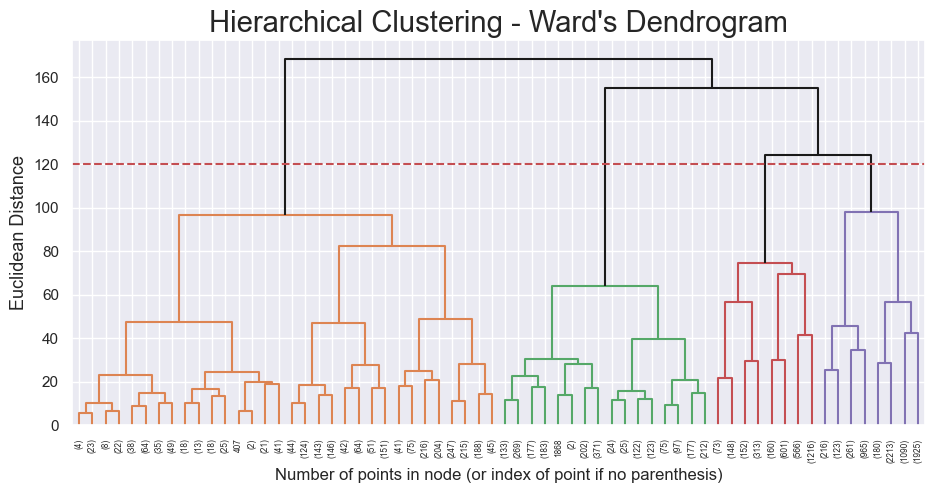

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 120
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

### Test cluster solutions

In [ ]:
# 4 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc4lust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=4)
hc4_labels = hc4lust.fit_predict(df[metric_features])

In [ ]:
# Characterizing the 4 clusters
df_concat = pd.concat((df, pd.Series(hc4_labels, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,Age,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,Dropout,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female
labels,,,,,,,,,,,,,,,,,,
0,0.007003,0.058798,0.006884,0.148286,0.745160,0.023232,0.003872,0.159042,0.013911,0.000143,0.889431,0.283897,-0.012656,0.030523,0.071852,0.090367,0.069754,0.606769
1,-0.008410,0.046678,0.005887,0.351556,0.589571,0.028595,0.035744,0.042893,0.024390,0.001682,0.664844,0.127352,1.607275,0.674040,1.375075,2.727556,1.651354,0.563078
2,-0.950068,0.008208,0.004104,0.708162,0.031008,0.216142,0.072959,0.039672,0.005928,0.001368,0.735978,0.758695,0.193639,2.158298,-0.165769,4.343926,-0.203887,0.563155
3,1.813771,0.049241,0.011459,0.279034,0.590585,0.029731,0.022917,0.092598,0.065965,0.006194,0.841127,0.234105,0.004645,0.504318,0.129957,1.290618,0.043056,0.628368


In [ ]:
# 2 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc2lust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=2)
hc2_labels = hc2lust.fit_predict(df[metric_features])

In [ ]:
# Characterizing the 2 clusters
df_concat = pd.concat((df, pd.Series(hc2_labels, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,Age,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,Dropout,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female
labels,,,,,,,,,,,,,,,,,,
0,0.30835,0.047358,0.007584,0.281404,0.578540,0.059056,0.021057,0.120613,0.026059,0.001936,0.849697,0.354930,0.028350,0.53041,0.044947,1.155608,0.014385,0.604679
1,-0.00841,0.046678,0.005887,0.351556,0.589571,0.028595,0.035744,0.042893,0.024390,0.001682,0.664844,0.127352,1.607275,0.67404,1.375075,2.727556,1.651354,0.563078


In [ ]:
## Let's put both HC4 and HC2 labels in the same df to compare

df_hc4_hc2 = pd.concat((df,
                        pd.Series(hc4_labels,
                                  name='hc4_labels',
                                  index=df.index),
                        pd.Series(hc2_labels,
                                  name='hc2_labels',
                                  index=df.index)
                        ), axis=1)

In [ ]:
## See crosstab of 4 vs 5

pd.crosstab(df_hc4_hc2['hc2_labels'],
           df_hc4_hc2['hc4_labels'])

hc4_labels,0,1,2,3
hc2_labels,,,,
0,6973,0,2193,3229
1,0,2378,0,0


In [ ]:
from collections import Counter

In [ ]:
Counter(hc4_labels)

Counter({0: 6973, 3: 3229, 1: 2378, 2: 2193})

### Final Hierarchical clustering solution

In [ ]:
# final cluster solution
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=4)
hc_labels = hclust.fit_predict(df[metric_features])

In [ ]:
# Characterizing the final clusters
df_concat = pd.concat((df, pd.Series(hc_labels, name='labels', index=df.index)), axis=1)
#df_concat.groupby('labels').mean()

In [ ]:
cluster_means = df_concat.groupby('labels').mean()[metric_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

labels,0,1,2,3
Age,0.01,-0.01,-0.95,1.81
Contract_Duration,0.28,0.13,0.76,0.23
PercentageOfVisits,-0.01,1.61,0.19,0.00
PercentageOfClasses,0.03,0.67,2.16,0.50
Freq_Visits_Day,0.07,1.38,-0.17,0.13
Visits_ActivePeriod,0.07,1.65,-0.20,0.04


In [ ]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
       
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [ ]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [ ]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_concat[metric_features])  # get total sum of squares
ssw_labels = df_concat[metric_features + ["labels"]].groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

0.3803983573071011

/var/folders/x6/c7bgz3zn0hg_kdmljrfw7k_m0000gn/T/ipykernel_20103/2606922159.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(cluster_labels)


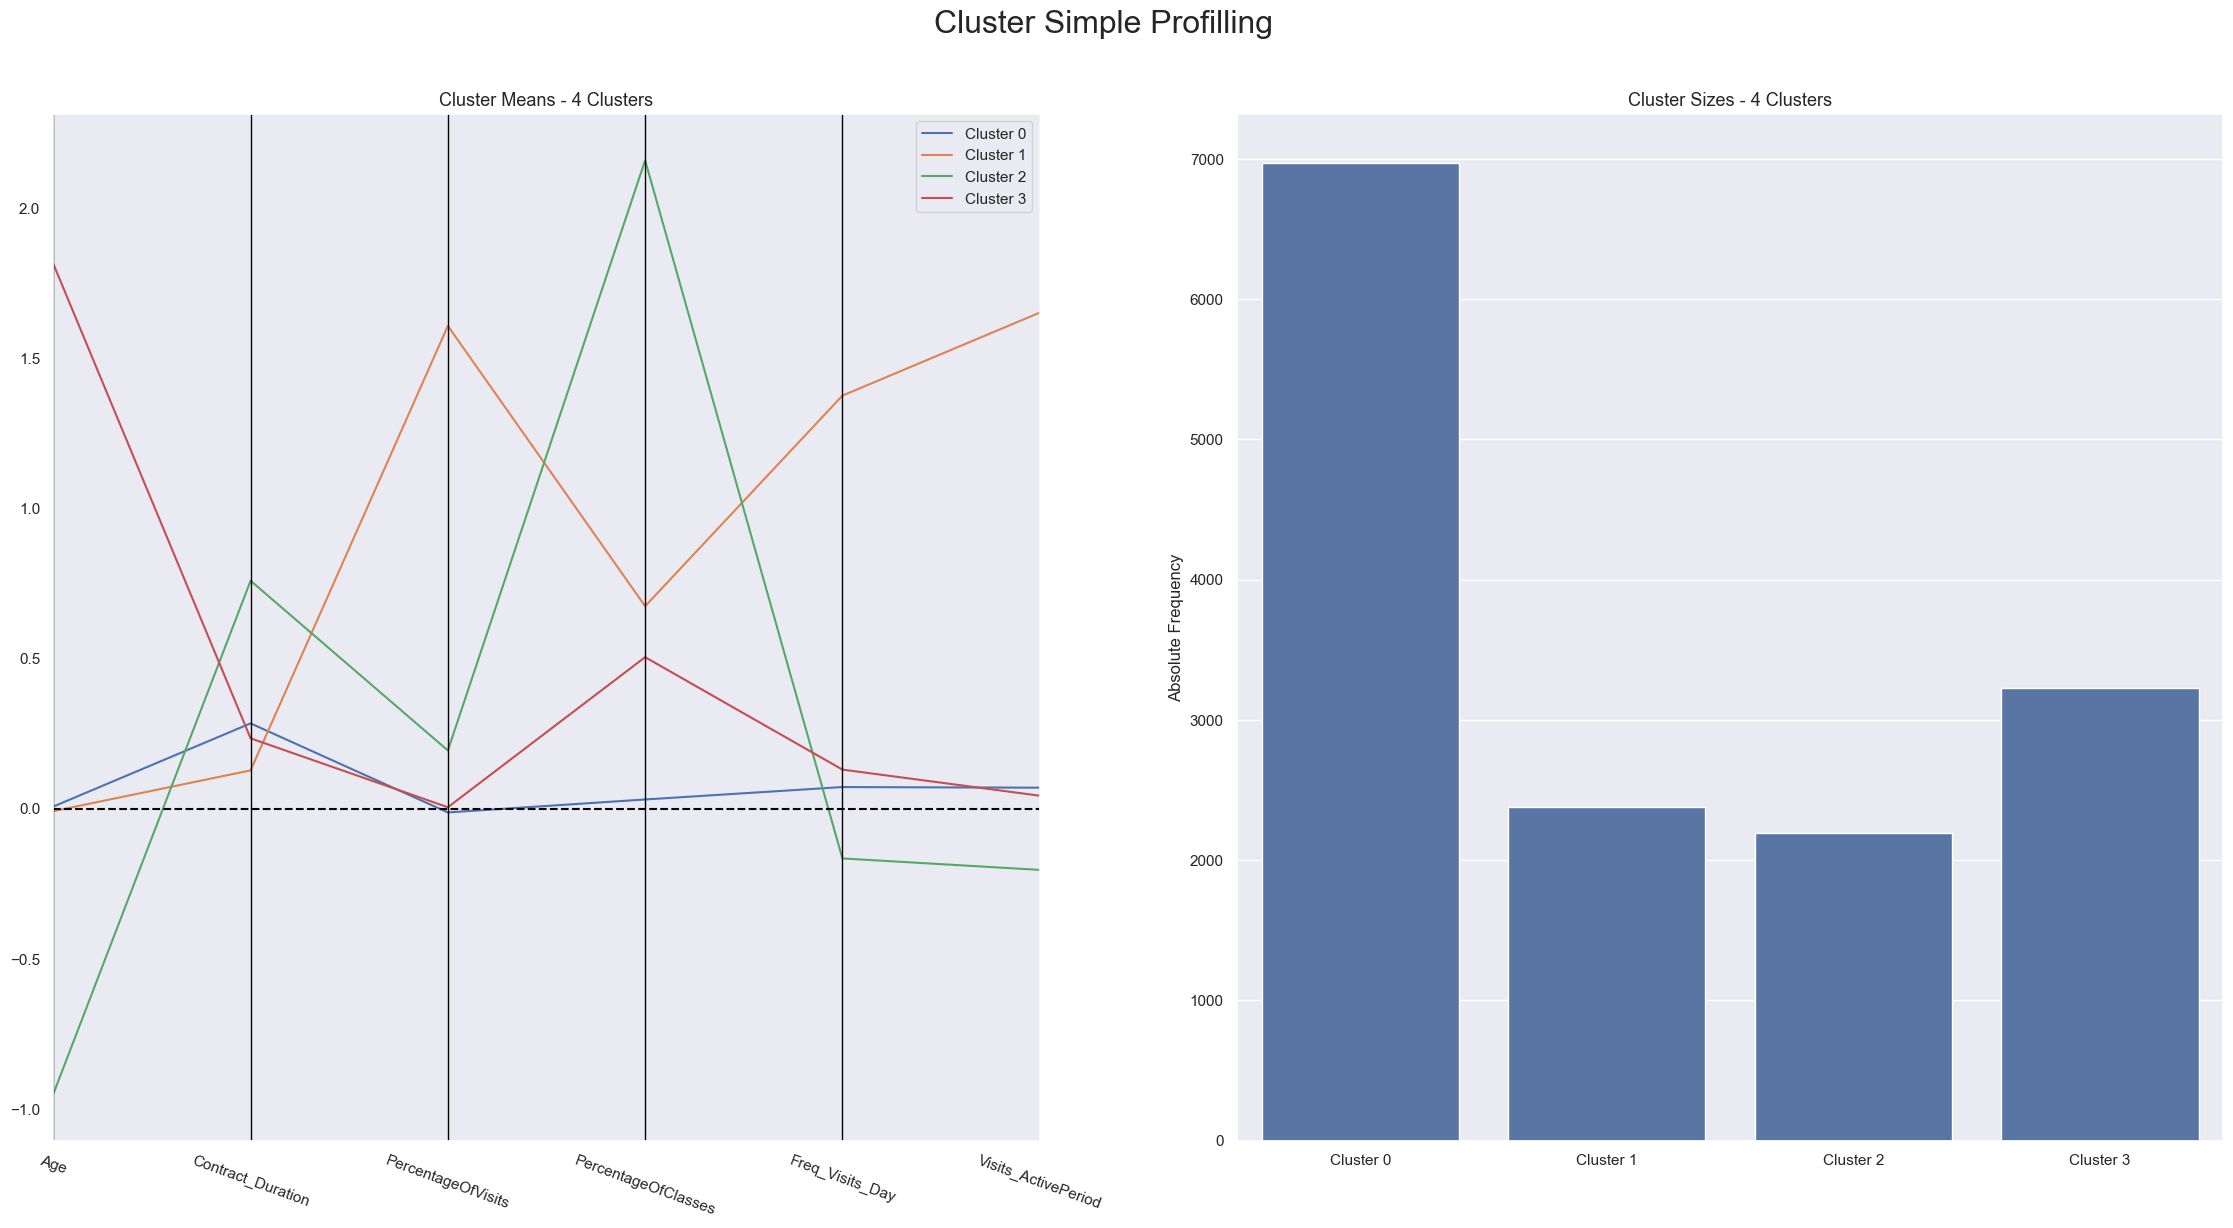

In [ ]:
cluster_profiles(
    df = df_concat[metric_features + ["labels"]], 
    label_columns = ["labels"], 
    figsize = (28, 13), 
    compar_titles = [""]
)

In [ ]:
non_metric_features= ['UseByTime',
 'WaterActivities',
 'FitnessActivities',
 'TeamActivities',
 'RacketActivities',
 'CombatActivities',
 'SpecialActivities',
 'OtherActivities',
 'Dropout',
 'Gender_Female']

In [ ]:

df_educ = df_concat[["labels"] + non_metric_features].groupby(["labels"]).sum()
df_concat[["labels"]].groupby(["labels"]).value_counts()

labels
0    6973
1    2378
2    2193
3    3229
Name: count, dtype: int64

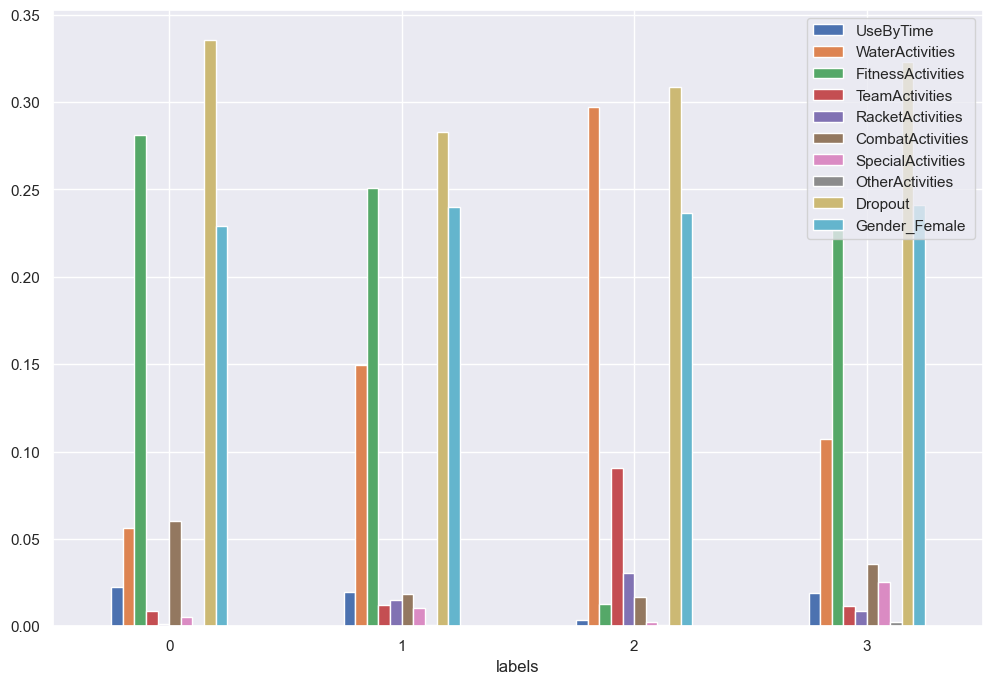

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

df_educ_pct = df_educ.apply(lambda col: col/df_educ.sum(axis=1))
df_educ_pct.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)

plt.show()

In [ ]:
from sklearn.manifold import TSNE

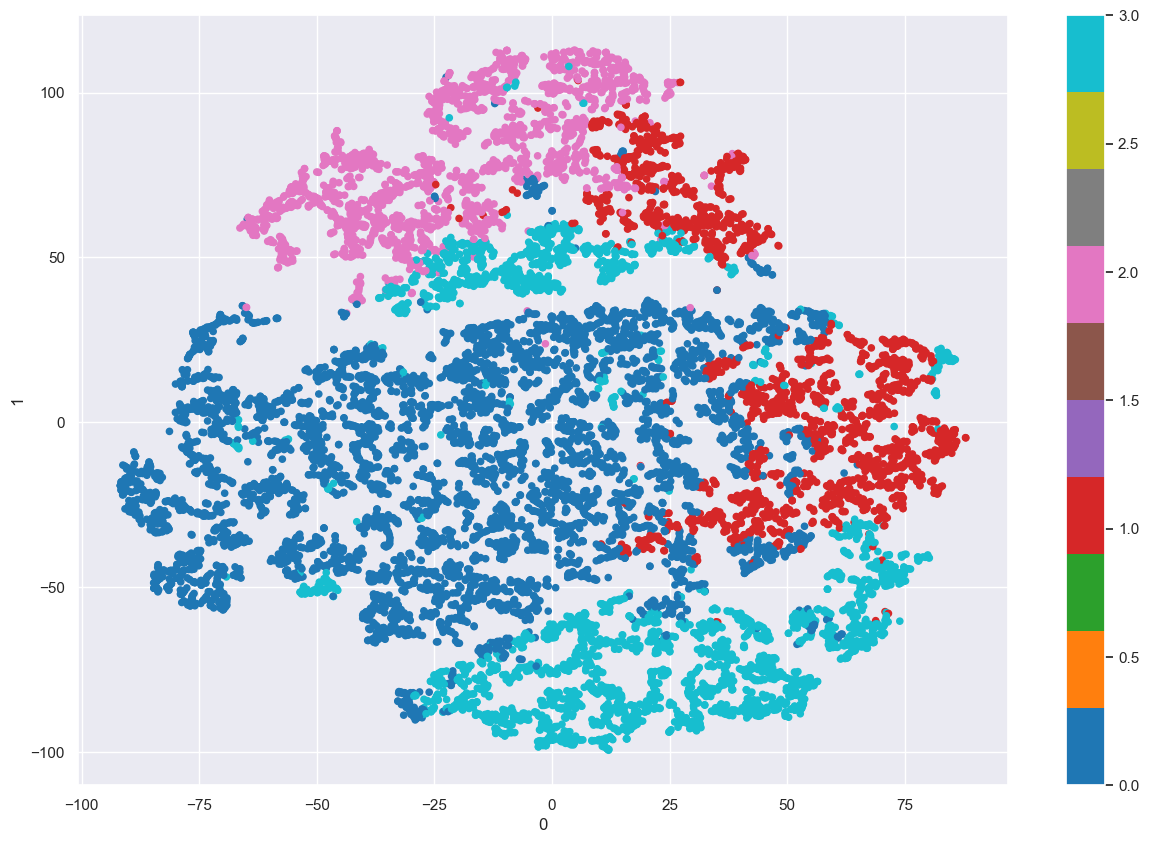

In [ ]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(df_concat[metric_features])
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_concat["labels"], colormap='tab10', figsize=(15,10))
plt.show()

In [ ]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_concat[metric_features + ['labels']], 'labels').drop('labels')

Age                    0.568666
Contract_Duration      0.041440
PercentageOfVisits     0.424148
PercentageOfClasses    0.554645
Freq_Visits_Day        0.287020
Visits_ActivePeriod    0.315627
dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

In [ ]:
# Preparing the data
X = df_concat.drop(columns=['labels'])
y = df_concat.labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 85.45% of the customers correctly
